## Importing the necessary libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import Input, Reshape, Dot
from tensorflow.keras.layers import Embedding
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
from keras.layers import Concatenate, Dense, Dropout
from keras.layers import Add, Activation, Lambda
import tensorflow as tf
import keras
from pprint import pprint
import matplotlib.pyplot as plot

# Data Preparation Steps

1) Collection of Data: Dataset for the project will be collected from movie lens. The data includes movie titles, genre, ratings, release date, and other relevant information.

2) Data Cleaning: The dataset will then be cleaned by eradicating duplicates. Missing fields in the data will be filled to remove any inconsistencies.

3) Feature Engineering: Transform the data into a suitable format for the Deep Neural Network Model. This involves selecting relevant features, encoding categorical variables, and normalizing numerical data.

4) Splitting the Data: Split the data into training and test sets. This is necessary to evaluate the performance of the Deep Neural Network Model and prevent overfitting.

# 1) **Assembling movie lens dataset**

#### **Summary of the dataset**

This dataset consists of 100,000 ratings from 943 users on 1682 movies and each user has rated at least 20 movies. The 100,000 ratings are represented from (1.5). This dataset was obtained from the MovieLens website.

Contains files like u.data, u.info, u.item, u.genre, u.user   

We  will be using the !wget function in python to download files over HTTP and FTP protocols. It works by recursively downloading multiple files.

After obtaining the dataset from the website, which is ml-100k.zip, we use the unzip function to extract the datasets inside.

From the dataset, we will be predicting the ratings a user, The user and the movie titles will be one-hot encoded and fed into the Deep Neural Network as distinct inputs and the ratings are given as output. The DNN model will be used to predict the ratings of the unseen movies.




In [ ]:
!wget -nc http://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip -n ml-100k.zip

--2023-03-24 15:34:17--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  16.1MB/s    in 0.3s    

2023-03-24 15:34:17 (16.1 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]

Archive:  ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base

#Loading MovieLens dataset




# 1) Reading in u.info

Dataset contains  the details of the users, items and ratings in the movie lens dataset.

In [ ]:
u_info = pd.read_csv('ml-100k/u.info', header=None)
u_info

,0
0,943 users
1,1682 items
2,100000 ratings


# 2) Reading in u.data dataset

From the documentation (README.txt) provided by the creator of the application, it is known that the data inside this dataset in tab separated and contains details like user id, movie title, rating and timestamp.


In [ ]:
## same item id is same as movie id, item id column is renamed as movie id
column_names_udata = ['user id','movie id','rating','timestamp']
ratings_dataset_100k = pd.read_csv('ml-100k/u.data', sep='\t',header=None,names=column_names_udata)
ratings_dataset_100k

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [ ]:
uitem_d = 'movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western'
column_names_uitem = uitem_d.split(' | ')
items_dataset_100k = pd.read_csv('ml-100k/u.item', sep='|',header=None,names=column_names_uitem,encoding='latin-1')
items_dataset_100k


,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
movie_dataset_100k = items_dataset_100k[['movie id','movie title']]
movie_dataset_100k

,movie id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


#Merging required datasets

We will not be needing all the data that we have read in from the dataset. Therefore, we will be merging the necessary datasets and columns in order for us to carry out this project.


#### 1) We will be merging the datasets: ratings_dataset and movies_dataset


In [ ]:
merged_dataset_100k = pd.merge(ratings_dataset_100k, movie_dataset_100k, how='inner', on='movie id')
merged_dataset_100k

,user id,movie id,rating,timestamp,movie title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


## Final refined dataset with user id, movie and ratings:



In [ ]:
refined_dataset_100k = merged_dataset_100k.groupby(by=['user id','movie title'], as_index=False).agg({"rating":"mean"})

refined_dataset_100k

,user id,movie title,rating
0,1,101 Dalmatians (1996),2.0
1,1,12 Angry Men (1957),5.0
2,1,"20,000 Leagues Under the Sea (1954)",3.0
3,1,2001: A Space Odyssey (1968),4.0
4,1,"Abyss, The (1989)",3.0
...,...,...,...
99688,943,"Wizard of Oz, The (1939)",3.0
99689,943,Wolf (1994),2.0
99690,943,Wyatt Earp (1994),1.0
99691,943,Young Guns (1988),4.0


# Encoding users and movie titles.

The movie titles and users are concoded so that the sequences had consistent length and no missing values. This is important, especially when dealing with Deep Neural Network Model. Presence of missing data might cause the performance of the model to dwindle.



In [ ]:
user_enc_100k = LabelEncoder()
refined_dataset_100k['user'] = user_enc_100k.fit_transform(refined_dataset_100k['user id'].values)
n_users_100k = refined_dataset_100k['user'].nunique()

item_enc_100k = LabelEncoder()
refined_dataset_100k['movie'] = item_enc_100k.fit_transform(refined_dataset_100k['movie title'].values)
n_movies_100k = refined_dataset_100k['movie'].nunique()

refined_dataset_100k['rating'] = refined_dataset_100k['rating'].values.astype(np.float32)
min_rating_100k = min(refined_dataset_100k['rating'])
max_rating_100k = max(refined_dataset_100k['rating'])
n_users_100k, n_movies_100k, min_rating_100k, max_rating_100k

(943, 1664, 1.0, 5.0)

In [ ]:
refined_dataset_100k

,user id,movie title,rating,user,movie
0,1,101 Dalmatians (1996),2.0,0,2
1,1,12 Angry Men (1957),5.0,0,3
2,1,"20,000 Leagues Under the Sea (1954)",3.0,0,6
3,1,2001: A Space Odyssey (1968),4.0,0,7
4,1,"Abyss, The (1989)",3.0,0,16
...,...,...,...,...,...
99688,943,"Wizard of Oz, The (1939)",3.0,942,1644
99689,943,Wolf (1994),2.0,942,1645
99690,943,Wyatt Earp (1994),1.0,942,1653
99691,943,Young Guns (1988),4.0,942,1658


# **Splitting the data into training and testing**

Splitting the dataset is an important step as it helps to evaluate the performance of the model on new, unseen data. The dataset is split into train and test sets.


In [ ]:
X_100k = refined_dataset_100k[['user', 'movie']].values
y_100k = refined_dataset_100k['rating'].values
X_train_100k, X_test_100k, y_train_100k, y_test_100k = train_test_split(X_100k, y_100k, test_size=0.1, random_state=50)
X_train_100k.shape, X_test_100k.shape, y_train_100k.shape, y_test_100k.shape

((89723, 2), (9970, 2), (89723,), (9970,))

In [ ]:
X_train_array_100k = [X_train_100k[:, 0], X_train_100k[:, 1]]
X_test_array_100k = [X_test_100k[:, 0], X_test_100k[:, 1]]

In [ ]:
X_train_100k, X_train_array_100k, X_train_array_100k[0].shape

(array([[ 180, 1152],
        [ 487,  389],
        [ 177,  302],
        ...,
        [ 431, 1588],
        [ 232,  399],
        [ 138,  612]]),
 [array([180, 487, 177, ..., 431, 232, 138]),
  array([1152,  389,  302, ..., 1588,  399,  612])],
 (89723,))

## Normalizing the labels
The labels are continuous and have a wide range of values. If the range of the labels is much larger than the range of the input features, the model may have difficulty learning the underlying patterns in the data. This is because the loss function used to train the model may be dominated by the large range of the labels, making it difficult for the model to learn from the input features.

Normalizing the labels can help to mitigate this problem by scaling the labels to a similar range as the input features. This can improve the stability of the training process, make it easier for the model to learn the underlying patterns in the data, and improve the generalization performance of the model on new, unseen data.

Min-max normalization: This involves scaling the labels to a range between 0 and 1, using the minimum and maximum values of the labels.


In [ ]:

y_train_100k = (y_train_100k - min_rating_100k)/(max_rating_100k - min_rating_100k)
y_test_100k = (y_test_100k - min_rating_100k)/(max_rating_100k - min_rating_100k)

## Building the DNN-SoftMax Model

In [ ]:

user = tf.keras.layers.Input(shape = (1,))
us = tf.keras.layers.Embedding(n_users_100k,150, embeddings_initializer = 'he_normal', embeddings_regularizer = tf.keras.regularizers.l2(1e-6))(user)
us = tf.keras.layers.Reshape((150,))(us)
movie = tf.keras.layers.Input(shape = (1,))
mov = tf.keras.layers.Embedding(n_movies_100k, 150, embeddings_initializer = 'he_normal', embeddings_regularizer=tf.keras.regularizers.l2(1e-6))(movie)
mov = tf.keras.layers.Reshape((150,))(mov)
x = tf.keras.layers.Concatenate()([us,mov])


x = tf.keras.layers.Dense(512, kernel_initializer='he_normal')(x)
x = tf.keras.layers.Activation(activation='relu')(x)
x = tf.keras.layers.Dense(256, kernel_initializer='he_normal')(x)
x = tf.keras.layers.Activation(activation='relu')(x)
x = tf.keras.layers.Dense(9)(x)
x = tf.keras.layers.Activation(activation='softmax')(x)
model = tf.keras.models.Model(inputs=[user,movie], outputs=x)
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=[tf.keras.metrics.RootMeanSquaredError(),tf.keras.losses.MeanSquaredError()])


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 150)       141450      ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 150)       249600      ['input_2[0][0]']                
                                                                                              

In [ ]:
history = model.fit(x = X_train_array_100k, y = y_train_100k, batch_size=128, epochs=50, verbose=1, validation_data=(X_test_array_100k, y_test_100k)
,shuffle=True)

Epoch 1/50
701/701 [==============================] - 13s 18ms/step - loss: 0.4469 - root_mean_squared_error: 0.6471 - mean_squared_error: 0.4188 - val_loss: 0.4177 - val_root_mean_squared_error: 0.6449 - val_mean_squared_error: 0.4159
Epoch 2/50
701/701 [==============================] - 12s 17ms/step - loss: 0.4099 - root_mean_squared_error: 0.6489 - mean_squared_error: 0.4210 - val_loss: 0.4140 - val_root_mean_squared_error: 0.6461 - val_mean_squared_error: 0.4174
Epoch 3/50
701/701 [==============================] - 12s 18ms/step - loss: 0.3958 - root_mean_squared_error: 0.6495 - mean_squared_error: 0.4219 - val_loss: 0.4219 - val_root_mean_squared_error: 0.6463 - val_mean_squared_error: 0.4178
Epoch 4/50
701/701 [==============================] - 12s 17ms/step - loss: 0.3730 - root_mean_squared_error: 0.6508 - mean_squared_error: 0.4236 - val_loss: 0.4268 - val_root_mean_squared_error: 0.6482 - val_mean_squared_error: 0.4202
Epoch 5/50
701/701 [==============================] - 13

## Validation Loss graph

Overfitting is happening!! Explain why

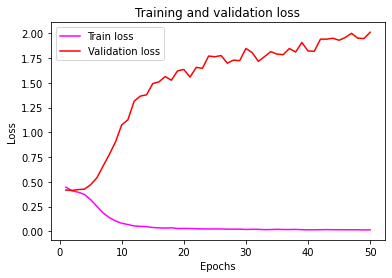

In [ ]:
history_dict_val = history.history
lossValues = history_dict_val['loss']
validationLossValues = history_dict_val['val_loss']
lenLv = len(lossValues)
ep_ochs = range(1, lenLv + 1)
plot.plot(ep_ochs, lossValues, color='magenta',linestyle='solid', label='Train loss')
plot.plot(ep_ochs, validationLossValues, color='red',linestyle='solid', label='Validation loss')
plot.title('Training and validation loss')
plot.xlabel('Epochs')
plot.ylabel('Loss')
plot.legend()
plot.show()

# Validartion Accuracy



<Figure size 432x288 with 0 Axes>

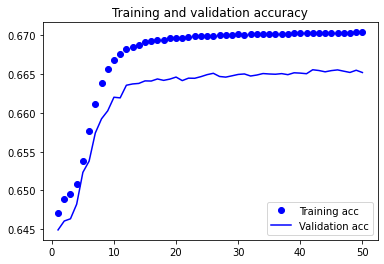

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['root_mean_squared_error']
val_acc = history.history['val_root_mean_squared_error']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


# Hypertuning Paramaters in the model to overcome overfitting

In [ ]:
user = tf.keras.layers.Input(shape = (1,))
us = tf.keras.layers.Embedding(n_users_100k, 150, embeddings_initializer = 'he_normal', embeddings_regularizer = tf.keras.regularizers.l2(1e-6))(user)
us = tf.keras.layers.Reshape((150,))(us)
movie = tf.keras.layers.Input(shape = (1,))
mov = tf.keras.layers.Embedding(n_movies_100k, 150, embeddings_initializer = 'he_normal', embeddings_regularizer=tf.keras.regularizers.l2(1e-6))(movie)
mov = tf.keras.layers.Reshape((150,))(mov)
x = tf.keras.layers.Concatenate()([us,mov])
x = tf.keras.layers.Dropout(0.05)(x)
x = tf.keras.layers.Dense(32, kernel_initializer='he_normal')(x)
x = tf.keras.layers.Activation(activation='relu')(x)
x = tf.keras.layers.Dropout(0.05)(x)

x = tf.keras.layers.Dense(16, kernel_initializer='he_normal')(x)
x = tf.keras.layers.Activation(activation='relu')(x)
x = tf.keras.layers.Dropout(0.05)(x)

x = tf.keras.layers.Dense(9)(x)
x = tf.keras.layers.Activation(activation='softmax')(x)

model = tf.keras.models.Model(inputs=[user,movie], outputs=x)
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=[tf.keras.metrics.RootMeanSquaredError(),tf.keras.losses.MeanSquaredError()])


In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 1, 150)       141450      ['input_3[0][0]']                
                                                                                                  
 embedding_3 (Embedding)        (None, 1, 150)       249600      ['input_4[0][0]']                
                                                                                            

In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.75, patience=3, min_lr=0.000001, verbose=1)

history = model.fit(x = X_train_array_100k, y = y_train_100k, batch_size=128, epochs=70, verbose=1, validation_data=(X_test_array_100k, y_test_100k)
,shuffle=True,callbacks=[reduce_lr])


Epoch 1/70
701/701 [==============================] - 9s 11ms/step - loss: 0.5915 - root_mean_squared_error: 0.6414 - mean_squared_error: 0.4113 - val_loss: 0.4198 - val_root_mean_squared_error: 0.6463 - val_mean_squared_error: 0.4176 - lr: 0.0010
Epoch 2/70
701/701 [==============================] - 6s 9ms/step - loss: 0.4191 - root_mean_squared_error: 0.6483 - mean_squared_error: 0.4203 - val_loss: 0.4156 - val_root_mean_squared_error: 0.6466 - val_mean_squared_error: 0.4181 - lr: 0.0010
Epoch 3/70
701/701 [==============================] - 7s 11ms/step - loss: 0.4081 - root_mean_squared_error: 0.6488 - mean_squared_error: 0.4210 - val_loss: 0.4151 - val_root_mean_squared_error: 0.6454 - val_mean_squared_error: 0.4165 - lr: 0.0010
Epoch 4/70
701/701 [==============================] - 6s 9ms/step - loss: 0.4020 - root_mean_squared_error: 0.6491 - mean_squared_error: 0.4213 - val_loss: 0.4159 - val_root_mean_squared_error: 0.6465 - val_mean_squared_error: 0.4179 - lr: 0.0010
Epoch 5/70

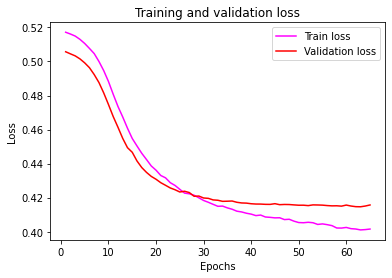

In [ ]:
history_dict_val = history.history
lossValues = history_dict_val['loss'][5:]
validationLossValues = history_dict_val['val_loss'][5:]
lenLv = len(lossValues)
ep_ochs = range(1, lenLv + 1)
plot.plot(ep_ochs, lossValues, color='magenta',linestyle='solid', label='Train loss')
plot.plot(ep_ochs, validationLossValues, color='red',linestyle='solid', label='Validation loss')
plot.title('Training and validation loss')
plot.xlabel('Epochs')
plot.ylabel('Loss')
plot.legend()
plot.show()

# Validation Accuracy graph for the tuned model



<Figure size 432x288 with 0 Axes>

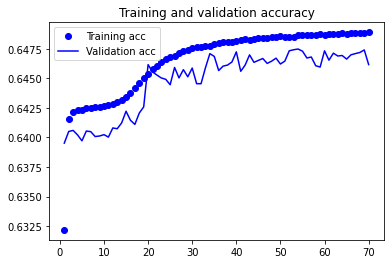

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['root_mean_squared_error']
val_acc = history.history['val_root_mean_squared_error']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

# Evaluation of current model using test set



In [ ]:
dnn_model_results = model.evaluate(X_test_array_100k, y_test_100k)

312/312 [==============================] - 2s 5ms/step - loss: 0.4141 - root_mean_squared_error: 0.6471 - mean_squared_error: 0.4187


# Getting the DNN-SoftMax model to recommend movies

In [ ]:
def dnn_recommender_system(user_id, model, n_movies):

  print("")
  print("Movie seen by the User:")
  pprint(list(refined_dataset_100k[refined_dataset_100k['user id'] == user_id]['movie title']))
  print("")

  encoded_100k_user_id = user_enc_100k.transform([user_id])

  seen_usermov_movies = list(refined_dataset_100k[refined_dataset_100k['user id'] == user_id]['movie'])
  unseen_usermov_movies = [i for i in range(min(refined_dataset_100k['movie']), max(refined_dataset_100k['movie'])+1) if i not in seen_usermov_movies]
  model_dnn_input = [np.asarray(list(encoded_100k_user_id)*len(unseen_usermov_movies)), np.asarray(unseen_usermov_movies)]
  predicted_usermov_ratings = model.predict(model_dnn_input)
  predicted_usermov_ratings = np.max(predicted_usermov_ratings, axis=1)
  sorted_index = np.argsort(predicted_usermov_ratings)[::-1]
  recommended_usermov_movies = item_enc_100k.inverse_transform(sorted_index)
  print("---------------------------------------------------------------------------------")
  print("Top "+str(n_movies_100k)+" Movie recommendations for the User "+str(user_id)+ " are:")
  pprint(list(recommended_usermov_movies[:n_movies_100k]))

In [ ]:
print("Enter user id")
user_id= int(input())

print("Enter number of movies to be recommended:")
n_movies = int(input())
dnn_recommender_system(user_id,model,n_movies_100k)


Enter user id
1
Enter number of movies to be recommended:
12

Movie seen by the User:
['101 Dalmatians (1996)',
 '12 Angry Men (1957)',
 '20,000 Leagues Under the Sea (1954)',
 '2001: A Space Odyssey (1968)',
 'Abyss, The (1989)',
 'Ace Ventura: Pet Detective (1994)',
 'Air Bud (1997)',
 'Akira (1988)',
 'Aladdin (1992)',
 'Alien (1979)',
 'Aliens (1986)',
 'All Dogs Go to Heaven 2 (1996)',
 'Amadeus (1984)',
 'Angels and Insects (1995)',
 "Antonia's Line (1995)",
 'Apocalypse Now (1979)',
 'Apollo 13 (1995)',
 'Aristocats, The (1970)',
 'Army of Darkness (1993)',
 'Austin Powers: International Man of Mystery (1997)',
 'Babe (1995)',
 'Back to the Future (1985)',
 'Bad Boys (1995)',
 'Basic Instinct (1992)',
 'Batman & Robin (1997)',
 'Batman Forever (1995)',
 'Batman Returns (1992)',
 'Beavis and Butt-head Do America (1996)',
 'Bedknobs and Broomsticks (1971)',
 'Belle de jour (1967)',
 'Big Night (1996)',
 'Billy Madison (1995)',
 'Birdcage, The (1996)',
 'Blade Runner (1982)',
 'Blu

# Testing the model on ML-1M Dataset

In [ ]:
!wget -nc http://files.grouplens.org/datasets/movielens/ml-1m.zip
!unzip -n ml-1m.zip -d ml-1m



File ‘ml-1m.zip’ already there; not retrieving.

Archive:  ml-1m.zip


In [ ]:
ratings_dataset_1m = pd.read_csv('ml-1m/ml-1m/ratings.dat',
                        delimiter='::', engine= 'python', header=None,
                        names=['user_id', 'movie_id', 'rating', 'timestamp'])

users_dataset_1m = pd.read_csv('ml-1m/ml-1m/users.dat',
                        delimiter='::', engine= 'python', header=None,
                        names=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

movies = pd.read_csv('ml-1m/ml-1m/movies.dat',
                        delimiter='::', engine= 'python', header=None,
                        names=['movie_id', 'title', 'genres'], encoding='latin-1')

In [ ]:
ratings_dataset_1m.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
users_dataset_1m.head()

,user_id,gender,zipcode,age_desc,occ_desc
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
movie_dataset_1m = movies[['movie_id','title']]
movie_dataset_1m.head()

,movie_id,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [ ]:
merged_dataset_1m = pd.merge(ratings_dataset_1m, movie_dataset_1m, how='inner', on='movie_id')
merged_dataset_1m.head()

,user_id,movie_id,rating,timestamp,title
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975)
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975)
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975)
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975)
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975)


In [ ]:
refined_dataset_1m = merged_dataset_1m.groupby(by=['user_id','title'], as_index=False).agg({"rating":"mean"})

refined_dataset_1m.head()

,user_id,title,rating
0,1,Airplane! (1980),4.0
1,1,Aladdin (1992),4.0
2,1,Antz (1998),4.0
3,1,Apollo 13 (1995),5.0
4,1,Awakenings (1990),5.0


In [ ]:
user_enc_1m = LabelEncoder()
refined_dataset_1m['user'] = user_enc_1m.fit_transform(refined_dataset_1m['user_id'].values)
n_users_1m = refined_dataset_1m['user'].nunique()

item_enc_1m = LabelEncoder()
refined_dataset_1m['movie'] = item_enc_1m.fit_transform(refined_dataset_1m['title'].values)
n_movies_1m = refined_dataset_1m['movie'].nunique()

refined_dataset_1m['rating'] = refined_dataset_1m['rating'].values.astype(np.float32)
min_rating_1m = min(refined_dataset_1m['rating'])
max_rating_1m = max(refined_dataset_1m['rating'])
n_users_1m, n_movies_1m, min_rating_1m, max_rating_1m

(6040, 3706, 1.0, 5.0)

In [ ]:
refined_dataset_1m.head()

,user_id,title,rating,user,movie
0,1,Airplane! (1980),4.0,0,84
1,1,Aladdin (1992),4.0,0,89
2,1,Antz (1998),4.0,0,188
3,1,Apollo 13 (1995),5.0,0,195
4,1,Awakenings (1990),5.0,0,239


In [ ]:
X_1m = refined_dataset_1m[['user', 'movie']].values
y_1m = refined_dataset_1m['rating'].values
X_train_1m, X_test_1m, y_train_1m, y_test_1m = train_test_split(X_1m, y_1m, test_size=0.1, random_state=50)
X_train_1m.shape, X_test_1m.shape, y_train_1m.shape, y_test_1m.shape


((900188, 2), (100021, 2), (900188,), (100021,))

In [ ]:
X_train_1m_array = [X_train_1m[:, 0], X_train_1m[:, 1]]
X_test_1m_array = [X_test_1m[:, 0], X_test_1m[:, 1]]

In [ ]:
X_train_1m, X_train_1m_array, X_train_1m_array[0].shape

(array([[4343, 1154],
        [5184, 1007],
        [1604, 3342],
        ...,
        [1448,   12],
        [ 689, 3293],
        [5625, 2743]], dtype=int64),
 [array([4343, 5184, 1604, ..., 1448,  689, 5625], dtype=int64),
  array([1154, 1007, 3342, ...,   12, 3293, 2743], dtype=int64)],
 (900188,))

In [ ]:
y_train_1m = (y_train_1m - min_rating_1m)/(max_rating_1m - min_rating_1m)
y_test_1m = (y_test_1m - min_rating_1m)/(max_rating_1m - min_rating_1m)

In [ ]:
user = tf.keras.layers.Input(shape = (1,))
us = tf.keras.layers.Embedding(n_users_1m, 150, embeddings_initializer = 'he_normal', embeddings_regularizer = tf.keras.regularizers.l2(1e-6))(user)
us = tf.keras.layers.Reshape((150,))(us)

movie = tf.keras.layers.Input(shape = (1,))
mov = tf.keras.layers.Embedding(n_movies_1m, 150, embeddings_initializer = 'he_normal', embeddings_regularizer=tf.keras.regularizers.l2(1e-6))(movie)
mov = tf.keras.layers.Reshape((150,))(mov)

x = tf.keras.layers.Concatenate()([us,mov])
x = tf.keras.layers.Dropout(0.05)(x)
x = tf.keras.layers.Dense(32, kernel_initializer='he_normal')(x)
x = tf.keras.layers.Activation(activation='relu')(x)
x = tf.keras.layers.Dropout(0.05)(x)

x = tf.keras.layers.Dense(16, kernel_initializer='he_normal')(x)
x = tf.keras.layers.Activation(activation='relu')(x)
x = tf.keras.layers.Dropout(0.05)(x)
x = tf.keras.layers.Dense(9)(x)
x = tf.keras.layers.Activation(activation='softmax')(x)

model = tf.keras.models.Model(inputs=[user,movie], outputs=x)
model.compile(optimizer='sgd', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=[tf.keras.metrics.RootMeanSquaredError(),tf.keras.losses.MeanSquaredError()])


In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.75, patience=3, min_lr=0.000001, verbose=1)

In [ ]:
history = model.fit(x = X_train_1m_array, y = y_train_1m, batch_size=128, epochs=70, verbose=1, validation_data=(X_test_1m_array, y_test_1m)
,shuffle=True, callbacks=[reduce_lr])


Epoch 1/70
7033/7033 [==============================] - 83s 12ms/step - loss: 0.5766 - root_mean_squared_error: 0.6488 - mean_squared_error: 0.4209 - val_loss: 0.5352 - val_root_mean_squared_error: 0.6521 - val_mean_squared_error: 0.4253 - lr: 0.0100
Epoch 2/70
7033/7033 [==============================] - 82s 12ms/step - loss: 0.5298 - root_mean_squared_error: 0.6506 - mean_squared_error: 0.4233 - val_loss: 0.5167 - val_root_mean_squared_error: 0.6521 - val_mean_squared_error: 0.4252 - lr: 0.0100
Epoch 3/70
7033/7033 [==============================] - 94s 13ms/step - loss: 0.4963 - root_mean_squared_error: 0.6521 - mean_squared_error: 0.4253 - val_loss: 0.4704 - val_root_mean_squared_error: 0.6548 - val_mean_squared_error: 0.4288 - lr: 0.0100
Epoch 4/70
7033/7033 [==============================] - 85s 12ms/step - loss: 0.4602 - root_mean_squared_error: 0.6546 - mean_squared_error: 0.4284 - val_loss: 0.4448 - val_root_mean_squared_error: 0.6566 - val_mean_squared_error: 0.4311 - lr: 0.0

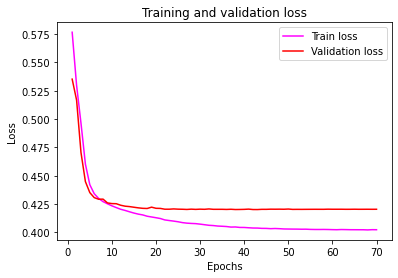

In [ ]:
history_dict_val = history.history
lossValues_1m = history_dict_val['loss']
validationLossValues_1m = history_dict_val['val_loss']
lenLv_1m = len(lossValues_1m)
ep_ochs_1m = range(1, lenLv + 1)
plot.plot(ep_ochs_1m, lossValues_1m, color='magenta',linestyle='solid', label='Train loss')
plot.plot(ep_ochs_1m, validationLossValues_1m, color='red',linestyle='solid', label='Validation loss')
plot.title('Training and validation loss')
plot.xlabel('Epochs')
plot.ylabel('Loss')
plot.legend()
plot.show()

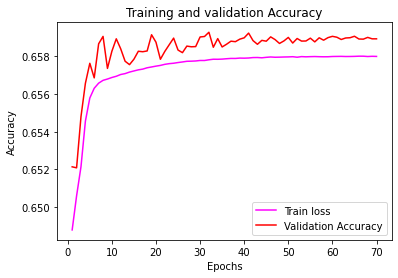

In [ ]:
history_dict_val = history.history
accValues_1m = history_dict_val['root_mean_squared_error']
validationAccValues_1m = history_dict_val['val_root_mean_squared_error']
lenLv_1m = len(accValues_1m)
ep_ochs_1m = range(1, lenLv_1m + 1)
plot.plot(ep_ochs_1m, accValues_1m, color='magenta',linestyle='solid', label='Train loss')
plot.plot(ep_ochs_1m, validationAccValues_1m, color='red',linestyle='solid', label='Validation Accuracy')
plot.title('Training and validation Accuracy')
plot.xlabel('Epochs')
plot.ylabel('Accuracy')
plot.legend()
plot.show()

In [ ]:
dnn_model_results_1m = model.evaluate(X_test_1m_array, y_test_1m)

3126/3126 [==============================] - 11s 3ms/step - loss: 0.4204 - root_mean_squared_error: 0.6589 - mean_squared_error: 0.4342


In [ ]:
import pandas as pd
technologies = {
    'ML-100K' :['0.6471','0.4187'],
    'ML-1M':['0.6589','0.4342'],

              }
index_labels=['RMSE','MSE']
df = pd.DataFrame(technologies,index=index_labels)
df


,ML-100K,ML-1M
RMSE,0.6471,0.6589
MSE,0.4187,0.4342
